In [1]:
import csv
import pandas as pd
import numpy as np
import tensorflow as tf

In [4]:
df=pd.read_csv('dataset/pulsar_stars.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [5]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [9]:
print('target_class:',set(df['target_class']))

target_class: {0, 1}


In [13]:
with open('dataset/pulsar_stars.csv') as csvfile :
    csvreader = csv.reader(csvfile)
    next(csvreader)
    rows = []
    for row in csvreader :
        rows.append(row)
        
data = np.asarray(rows, dtype = 'float32')
input_cnt,output_cnt=8,1

In [14]:
data[:][0]

array([140.5625    ,  55.68378   ,  -0.23457141,  -0.6996484 ,
         3.1998327 ,  19.110426  ,   7.9755316 ,  74.242226  ,
         0.        ], dtype=float32)

In [16]:
train_ratio = 0.8
mb_size = 32

test_begin_idx = int(data.shape[0]*train_ratio)

print(data.shape[0])
print('test_begin_index : ',test_begin_idx)

17898
test_begin_index :  14318


In [18]:
shuffle_map = np.arange(data.shape[0])

np.random.seed(1234) #같은 랜덤값이 나오게.
np.random.shuffle(shuffle_map)
print(shuffle_map[:5])

[ 9375  1570 15443 14077  6079]


In [20]:
train_data = data[shuffle_map[:test_begin_idx]]
test_data = data[shuffle_map[test_begin_idx:]]
print(train_data.shape)
print(test_data.shape)

(14318, 9)
(3580, 9)


In [21]:
train_x,train_y=train_data[:,:-output_cnt], train_data[:,-output_cnt:]
test_x,test_y=test_data[:,:-output_cnt], test_data[:,-output_cnt:]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(14318, 8)
(14318, 1)
(3580, 8)
(3580, 1)


In [24]:
pulsar_DNN_drop_sigmoid = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128,activation='relu', input_shape=(8,)),
    tf.keras.layers.Dense(units=64,activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=32,activation='relu'),
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])

In [25]:
pulsar_DNN_drop_sigmoid.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1152      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [30]:
pulsar_DNN_drop_sigmoid.compile(optimizer=tf.keras.optimizers.Adam(),
                                loss = 'binary_crossentropy',
                                metrics = ['accuracy'])

In [31]:
history = pulsar_DNN_drop_sigmoid.fit(train_x, train_y,
                                      batch_size = 32,
                                      epochs     = 25,
                                      validation_split = 0.2,
                                      callbacks = [tf.keras.callbacks.EarlyStopping(patience=3)])

Epoch 1/25
358/358 [==============================] - 2s 3ms/step - loss: 0.2224 - accuracy: 0.9509 - val_loss: 0.0869 - val_accuracy: 0.9787
Epoch 2/25
358/358 [==============================] - 1s 2ms/step - loss: 0.1260 - accuracy: 0.9682 - val_loss: 0.0799 - val_accuracy: 0.9780
Epoch 3/25
358/358 [==============================] - 1s 2ms/step - loss: 0.1125 - accuracy: 0.9689 - val_loss: 0.0926 - val_accuracy: 0.9745
Epoch 4/25
358/358 [==============================] - 1s 2ms/step - loss: 0.1087 - accuracy: 0.9693 - val_loss: 0.1398 - val_accuracy: 0.9787
Epoch 5/25
358/358 [==============================] - 1s 2ms/step - loss: 0.1050 - accuracy: 0.9701 - val_loss: 0.1129 - val_accuracy: 0.9797


In [38]:
pulsar_DNN_drop_sigmoid.save('pulsar_DNN_drop_sigmoid.h5')

In [32]:
import matplotlib.pyplot as plt


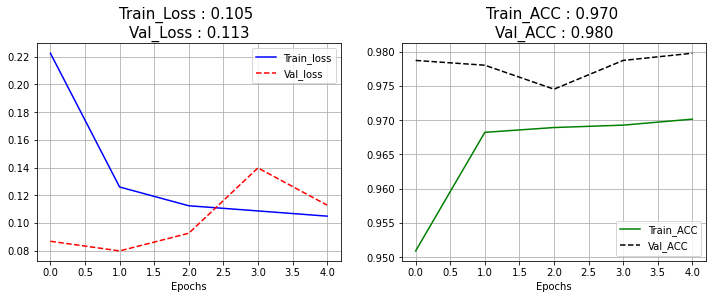

In [33]:
val_accuracy = history.history['val_accuracy']
accuracy     = history.history['accuracy']

val_loss = history.history['val_loss']
loss     = history.history['loss']

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)

plt.plot(history.history['loss'], 'b-',      label = 'Train_loss')
plt.plot(history.history['val_loss'], 'r--', label = 'Val_loss')

plt.xlabel('Epochs')

plt.title("Train_Loss : {:.3f} \nVal_Loss : {:.3f}".format(loss[-1], val_loss[-1]),
          fontsize = 15)

plt.legend()
plt.grid()

plt.subplot(1,2,2)

plt.plot(history.history['accuracy'], 'g-',      label = 'Train_ACC')
plt.plot(history.history['val_accuracy'], 'k--', label = 'Val_ACC')
plt.xlabel('Epochs')

plt.title("Train_ACC : {:.3f} \nVal_ACC : {:.3f}".format(accuracy[-1], val_accuracy[-1]),
          fontsize = 15)

plt.legend()
plt.grid()
plt.show()

In [ ]:
pred_Y = pulsar_DNN_drop_sigmoid.predict(test_x)
pred_Y = np.round(pred_Y)
print(pred_Y[:20])

In [36]:
print(pd.DataFrame(pred_Y).value_counts())
print(pd.DataFrame(test_y).value_counts())

0.0    3297
1.0     283
dtype: int64
0.0    3258
1.0     322
dtype: int64


In [ ]:
#혼동행렬(Confusion Matrix) ****
#TP FN
#FP TN

In [44]:
est_yes = np.greater(pred_Y,0.5) #0.5보다 크면 참 반환
print('est_yes[:5] : \n',est_yes[:5])

ans_yes = np.greater(test_y, 0.5)
print("ans_yes : \n", ans_yes[:5])

est_yes[:5] : 
 [[False]
 [False]
 [False]
 [False]
 [False]]
ans_yes : 
 [[False]
 [False]
 [False]
 [False]
 [False]]


In [45]:
#참 거짓을 반대로 반환
est_no = np.logical_not(est_yes)
print(est_no[:5])
ans_no = np.logical_not(ans_yes)
print(ans_no[:5])

[[ True]
 [ True]
 [ True]
 [ True]
 [ True]]
[[ True]
 [ True]
 [ True]
 [ True]
 [ True]]


In [46]:
tp = np.sum(np.logical_and(est_yes,ans_yes))
print('TP :',tp)
tn = np.sum(np.logical_and(est_no,ans_no))
print('TN :',tn)
fp = np.sum(np.logical_and(est_yes,ans_no))
print('FP :',fp)
fn = np.sum(np.logical_and(est_no,ans_yes))
print('FN :',fn)

TP : 261
TN : 3236
FP : 22
FN : 61


In [49]:
#안전한 나눗셈함수 만들기

def safe_div(p,q):
    p,q=float(p),float(q)
    
    if np.abs(q)<1.0e-20:
        return np.sign(p) #작은수라도 부호에따라 -,+,0 반환
    
    return p/q

In [50]:
precision = safe_div(tp,(tp+fp))
print('precision :',precision)

recall = safe_div(tp , (tp+fn))
print('recall :',recall)

accuracy = safe_div(tp+tn,(tp+tn+fp+fn))
print("accuracy :",accuracy)

f1 = 2*safe_div((recall*precision),(recall+precision))
print("F1-score :",f1)

precision : 0.9222614840989399
recall : 0.8105590062111802
accuracy : 0.9768156424581006
F1-score : 0.8628099173553719


In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [55]:
print(confusion_matrix(test_y[:,0],pred_Y[:,0]))
print("accuracy_score :",accuracy_score(test_y[:,0],pred_Y[:,0]))
print("precision_score :",precision_score(test_y[:,0],pred_Y[:,0]))
print("recall_score :",recall_score(test_y[:,0],pred_Y[:,0]))
print("f1_score :",f1_score(test_y[:,0],pred_Y[:,0]))

[[3236   22]
 [  61  261]]
accuracy_score : 0.9768156424581006
precision_score : 0.9222614840989399
recall_score : 0.8105590062111802
f1_score : 0.8628099173553719


In [56]:
import numpy as np
import matplotlib.pyplot as plt

In [57]:
def func_exp(x):
    return np.round(np.exp(x),3)

A_real = func_exp(0.5)
A_fake = func_exp(0)

print("A_real :",A_real)
print("A_fake :",A_fake)

A_real : 1.649
A_fake : 1.0


In [62]:
k = 1/(A_real+A_fake)
print("A real 확률 :",np.round(A_real * k,3))
print("A fake 확률 :",np.round(A_fake * k,3))

A real 확률 : 0.622
A fake 확률 : 0.378


In [60]:
A_real*k

0.6224990562476406

In [63]:
B_real = func_exp(-1)
B_fake = func_exp(0)

print("B_real :",B_real)
print("B_fake :",B_fake)

B_real : 0.368
B_fake : 1.0


In [64]:
k = 1/(B_real+B_fake)
print("B real 확률 :",np.round(B_real * k,3))
print("B fake 확률 :",np.round(B_fake * k,3))

B real 확률 : 0.269
B fake 확률 : 0.731


In [67]:
def sigmoid(x):
    pred_Y = 1/(1+np.exp(-x))
    return np.round(pred_Y*100,3)

for x in range(-6,6,1):
    P_T = sigmoid(x)
    print("x value : {} -> {}%".format(x,P_T))

x value : -6 -> 0.247%
x value : -5 -> 0.669%
x value : -4 -> 1.799%
x value : -3 -> 4.743%
x value : -2 -> 11.92%
x value : -1 -> 26.894%
x value : 0 -> 50.0%
x value : 1 -> 73.106%
x value : 2 -> 88.08%
x value : 3 -> 95.257%
x value : 4 -> 98.201%
x value : 5 -> 99.331%


In [68]:
rain_prob=0.01
no_rain_prob=0.99

def amount_of_info(prob):
    amount_of_info = -np.log(prob)
    return np.round(amount_of_info,3)

In [69]:
H_1 = amount_of_info(rain_prob)
H_2 = amount_of_info(no_rain_prob)

print("rain prob of amount of info :",H_1)
print("no rain prob of amount of info :",H_2)

rain prob of amount of info : 4.605
no rain prob of amount of info : 0.01


In [72]:
import numpy as np
real_prob = np.array([0.526,0.295,0.179])
human_Q = np.array([0.6,0.2,0.2])
AI_Q = np.array([0.4,0.3,0.3])

In [73]:
class Entropy():
    def __init__(self, Prob, Q):
        self.Prob = Prob
        self.Q = Q

In [74]:
def out_entropy(self, H_Q = True):
    global cross_entropy, info_entropy
    amount_of_info_row = []
    if H_Q == True : #cross 엔트로피
        for i in range(len(self.Q)):
            amount_of_info = -self.Prob[i]*np.log(self.Q[i])
            amount_of_info_row.append(amount_of_info)
                
        cross_entropy = np.sum(amount_of_info_row)
        print("--- cross entropy ---")
        
        return np.round(cross_entropy, 3)
    else : #정보 엔트로피 
        for p in self.Prob:
            amount_of_info = -p*np.log(p)
            amount_of_info_row.append(amount_of_info)
            
        info_entropy = np.sum(amount_of_info_row)
        print("---information entropy ---")
        
        return np.round(info_entropy,3)
    
Entropy.entropy = out_entropy

In [78]:
class_entropy_1 =Entropy(real_prob,human_Q)

In [80]:
Human_info_entropy = class_entropy_1.entropy(H_Q=False)
print(Human_info_entropy)
Human_cross_entropy = class_entropy_1.entropy(H_Q=True)
print(Human_cross_entropy)

---information entropy ---
1.006
--- cross entropy ---
1.032


In [83]:
class_entropy_2 = Entropy(real_prob, AI_Q)
AI_info_entropy = class_entropy_2.entropy(H_Q=False)
print(AI_info_entropy)

AI_cross_entropy = class_entropy_2.entropy(H_Q=True)
print(AI_cross_entropy)

---information entropy ---
1.006
--- cross entropy ---
1.053


In [84]:
def sigmoid_A(x):
    y = 1/(1+np.exp(-x))
    
    print(y)


In [92]:
sigmoid_A(10000)

1.0


In [87]:
def sigmoid_B(x):
    y = np.exp(x)/(1+np.exp(x))
    print(y)

In [91]:
sigmoid_B(100)
sigmoid_B(-10)

1.0
4.5397868702434395e-05


In [93]:
# 양수일때는 A, 음수일때는 b로 구축.

def relu(x):
    return np.maximum(x,0)

In [97]:
def sigmoid_C(x):
    result = np.exp(-relu(-x)) / (1+np.exp(-np.abs(x)))
    print(result)

In [98]:
x_list = [1000,-1000,0]
for i in x_list :
    sigmoid_C(i)

1.0
0.0
0.5
